# Videogames Analysis

In [367]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress

#retrieving our key 
from config import novak_apikey

# Use this to pretty print the JSON
from pprint import pprint #OPTIONAL


In [368]:
#getting url- -RAWG GAMES top rating games in 2022
base_url = 'https://api.rawg.io/api' 

#build partial query url
rawg_url = f'{base_url}/games?key={novak_apikey}'

# # This would display the URL - parsed information
# print(rawg_url)

response = requests.get(rawg_url)

In [369]:
data = response.json()

# Using json.dumps() for pretty print - This is the 1st page only
print(json.dumps(data, indent=4, sort_keys= False))

{
    "count": 868748,
    "next": "https://api.rawg.io/api/games?key=40a70634fa354d1fbaa5a193828cfa6d&page=2",
    "previous": null,
    "results": [
        {
            "id": 3498,
            "slug": "grand-theft-auto-v",
            "name": "Grand Theft Auto V",
            "released": "2013-09-17",
            "tba": false,
            "background_image": "https://media.rawg.io/media/games/456/456dea5e1c7e3cd07060c14e96612001.jpg",
            "rating": 4.47,
            "rating_top": 5,
            "ratings": [
                {
                    "id": 5,
                    "title": "exceptional",
                    "count": 3685,
                    "percent": 59.02
                },
                {
                    "id": 4,
                    "title": "recommended",
                    "count": 2049,
                    "percent": 32.82
                },
                {
                    "id": 3,
                    "title": "meh",
                    "count":

In [370]:
# Number of results in this API
data['count']

868748

In [371]:
# Going through games in first page
for game in data['results']:
    print(game['name'])
    
# Display number of games available
len(data['results'])


Grand Theft Auto V
The Witcher 3: Wild Hunt
Portal 2
Tomb Raider (2013)
Counter-Strike: Global Offensive
Portal
Left 4 Dead 2
The Elder Scrolls V: Skyrim
BioShock Infinite
Borderlands 2
Life is Strange
Red Dead Redemption 2
Half-Life 2
BioShock
Limbo
DOOM (2016)
Fallout 4
God of War (2018)
Destiny 2
Team Fortress 2


20

In [372]:
# List to contain all data for urls
total_results = []

# Getting pages 1-5 and their data (5 pages for now)
for page_num in range(1, 6):
    
    # New urls
    multiple_url = f"{rawg_url}&page=" + str(page_num)
    
    ## this would print the url(s) retrieved
    # Not printing due to API privacy
    # print(url)
    
    #requesting information and getting as .json()
    data = requests.get(multiple_url).json()
    
    # Getting all the information from each page
    # and storing it in total_results
    total_results = total_results + data['results']

# Display pretty by using json.dumps()
print(json.dumps(total_results, indent = 4, sort_keys = False))

[
    {
        "id": 3498,
        "slug": "grand-theft-auto-v",
        "name": "Grand Theft Auto V",
        "released": "2013-09-17",
        "tba": false,
        "background_image": "https://media.rawg.io/media/games/456/456dea5e1c7e3cd07060c14e96612001.jpg",
        "rating": 4.47,
        "rating_top": 5,
        "ratings": [
            {
                "id": 5,
                "title": "exceptional",
                "count": 3685,
                "percent": 59.02
            },
            {
                "id": 4,
                "title": "recommended",
                "count": 2049,
                "percent": 32.82
            },
            {
                "id": 3,
                "title": "meh",
                "count": 396,
                "percent": 6.34
            },
            {
                "id": 1,
                "title": "skip",
                "count": 114,
                "percent": 1.83
            }
        ],
        "ratings_count": 6161,
        "r

In [373]:
# Variable to count the avaiable games from 5 pages
count = 0

# Display all available games from pages previously retrieved
for game_names in total_results:
    
    # display all games from total_results
    print(game_names['name'])
    
    # count total games retrieved
    count +=1

# display how many games we got
print(f'\nNow we have {count} games and their data to work with.')

Grand Theft Auto V
The Witcher 3: Wild Hunt
Portal 2
Tomb Raider (2013)
Counter-Strike: Global Offensive
Portal
Left 4 Dead 2
The Elder Scrolls V: Skyrim
BioShock Infinite
Borderlands 2
Life is Strange
Red Dead Redemption 2
Half-Life 2
BioShock
Limbo
DOOM (2016)
Fallout 4
God of War (2018)
Destiny 2
Team Fortress 2
PAYDAY 2
Horizon Zero Dawn
Grand Theft Auto IV
Rocket League
Dota 2
Terraria
Cyberpunk 2077
Warframe
Metro 2033
Metal Gear Solid V: The Phantom Pain
Rise of the Tomb Raider
Batman: Arkham Knight
The Walking Dead: Season 1
The Witcher 2: Assassins of Kings Enhanced Edition
Half-Life 2: Lost Coast
Middle-earth: Shadow of Mordor
Grand Theft Auto: San Andreas
The Witcher: Enhanced Edition Director's Cut
BioShock 2
Half-Life 2: Episode One
Half-Life 2: Episode Two
Hitman
Apex Legends
Hollow Knight
Mirror's Edge
Little Nightmares
Hotline Miami
Dark Souls III
Outlast
Deus Ex: Mankind Divided
Spec Ops: The Line
BioShock Remastered
Marvel's Spider-Man
Far Cry 3
Amnesia: The Dark Desc

In [374]:
# LISTS TO HOLD THE DATA WE WANT FOR OUR DATAFRAME
game_name = [] # to hold the names of the games
metacritic_data = [] # hold critic information
release_date = [] # list for game release date
recommendation = [] # users ratings
count_recommendation = []
playtime =[] # playtime in hours
latest_update =[] # latest update date
users_added = [] # count users added the game
game_owned = [] # users with owned status
genres = [] # genres 

# Retrieve data by using for-loop
for results in total_results:
    
    name = results['name']
    game_name.append(name)
    
    metacritic = results['metacritic']
    metacritic_data.append(metacritic)
    
    date = results['released']
    release_date.append(date)
    
    rating1 = results['ratings'][0]['title']
    recommendation.append(rating1)
    
    rating2 = results['ratings'][0]['count']
    count_recommendation.append(rating2)
    
    time = results['playtime']
    playtime.append(time)
    
    updated = results['updated']
    latest_update.append(updated)
    
    count = results['added']
    users_added.append(count)
    
    owned = results['added_by_status']['owned']
    game_owned.append(owned)
    
    genre = results['genres'][0]['name']
    genres.append(genre)
    

In [375]:
# Create dataframe
videogames_df = pd.DataFrame({
    'Videogame': game_name,
    'Release Date': release_date,
    'Recommendation Level': recommendation,
    'Reco. Count': count_recommendation,
    'Metacritic': metacritic_data,
    'Playtime(h)': playtime,
    'Users Added': users_added,
    'Users Own': game_owned,
    'Genres': genres,
    'Latest Update': latest_update
})

# # Align dataframe to the left BUT unable to use .head()
# videogames_left_df = videogames_df.style.set_properties(**{'text-align': 'left'}) 

# # To change df index to start at 1 
# videogames_df.index = videogames_df.index+1

# display dataframe
videogames_df.head()

,Videogame,Release Date,Recommendation Level,Reco. Count,Metacritic,Playtime(h),Users Added,Users Own,Genres,Latest Update
0,Grand Theft Auto V,2013-09-17,exceptional,3685,92.0,73,18846,10927,Action,2023-02-11T10:23:05
1,The Witcher 3: Wild Hunt,2015-05-18,exceptional,4582,92.0,46,17971,10362,Action,2023-02-10T18:35:45
2,Portal 2,2011-04-18,exceptional,3638,95.0,11,16924,10461,Shooter,2023-02-11T22:30:16
3,Tomb Raider (2013),2013-03-05,recommended,2167,86.0,10,14850,9634,Action,2023-02-12T00:15:43
4,Counter-Strike: Global Offensive,2012-08-21,recommended,1487,81.0,65,14649,11118,Action,2023-02-10T22:38:11


# Metacritic vs. Playtime
 *See Fig1*

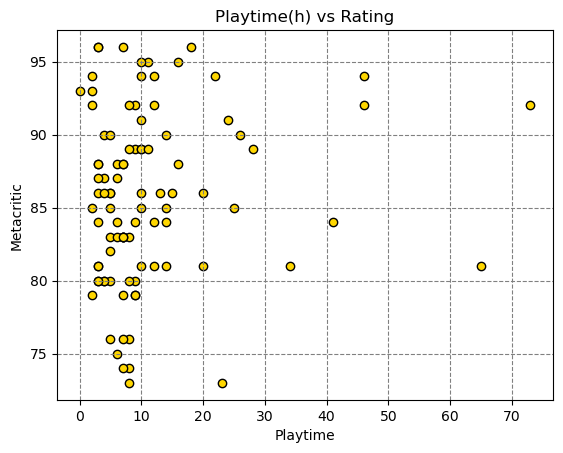

In [378]:
##(x)Playtime vs. (y)Metacritic

x_values = videogames_df['Playtime(h)']
y_values = videogames_df['Metacritic']

# Build scatter plot for (x)Playtime vs. (y)Metacritic
plt.scatter(x_values, y_values, color="gold", edgecolors = "black")
plt.grid(color="grey", linestyle="--")

# Incorporate the other graph properties
plt.title("Playtime(h) vs Rating")
plt.xlabel("Playtime")
plt.ylabel("Metacritic")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# New dataframe based on Playtime hours being less or equals to 30 hours

In [ ]:
# Filtered dataFrame where playtime is less or equals to 30 hours
playtime_df = videogames_df[videogames_df['Playtime(h)'] <= 30]

# Reset index to 0
playtime_df = playtime_df.reset_index()

# Removed 'index' column
playtime_df = playtime_df[['Videogame', 'Release Date', 'Recommendation Level', 
                           'Reco. Count', 'Metacritic', 'Playtime(h)', 'Users Added', 
                           'Users Own', 'Genres', 'Latest Update']]

# Display sample data
playtime_df.head()

,Videogame,Release Date,Recommendation Level,Reco. Count,Metacritic,Playtime(h),Users Added,Users Own,Genres,Latest Update
0,Portal 2,2011-04-18,exceptional,3638,95.0,11,16924,10461,Shooter,2023-02-11T22:30:16
1,Tomb Raider (2013),2013-03-05,recommended,2167,86.0,10,14850,9634,Action,2023-02-12T00:15:43
2,Portal,2007-10-09,exceptional,2629,90.0,4,14376,8910,Adventure,2023-02-11T10:16:12
3,Left 4 Dead 2,2009-11-17,recommended,1596,89.0,9,14357,10500,Action,2023-02-11T22:30:25
4,BioShock Infinite,2013-03-26,exceptional,2073,94.0,12,13785,8215,Action,2023-02-12T00:11:51


In [ ]:
# Check for NA values in all df
print(playtime_df.isnull().sum().sum())

# Found NA values are from Metacritic colum
print(playtime_df['Metacritic'].isnull().sum())

5
5


In [ ]:
# Drop NaN values in dataframe
playtime_df.dropna(inplace=True)

# Check again for possible NA values
print(playtime_df.isnull().sum().sum())

0


# Metacritic vs. Playtime
### Based on new dataframe
 *See Fig2*

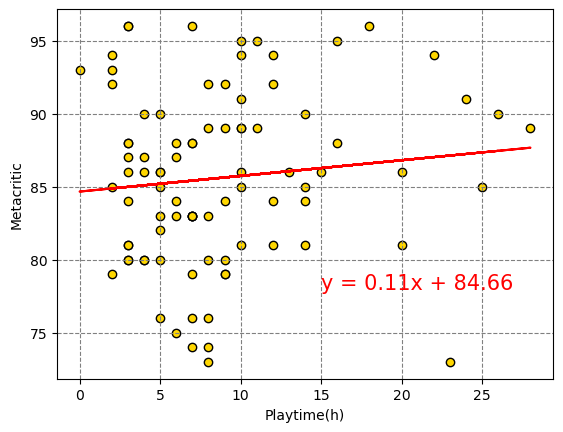

In [ ]:
x_values = playtime_df['Playtime(h)']
y_values = playtime_df['Metacritic']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="gold", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 78),fontsize=15,color="red")
plt.grid(color="grey", linestyle="--")
plt.xlabel('Playtime(h)')
plt.ylabel('Metacritic')

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

# Recommended Count vs. Playtime(h)
 *See Fig1*

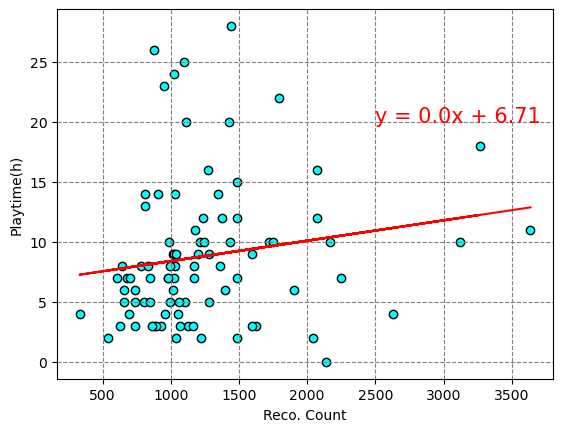

In [ ]:
## RECOMMENDED COUNT VS PLAYTIME(h)
x_values = playtime_df['Reco. Count']
y_values = playtime_df['Playtime(h)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="cyan", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2500,20),fontsize=15,color="red")
plt.grid(color="grey", linestyle="--")
plt.xlabel('Reco. Count')
plt.ylabel('Playtime(h)')
plt.show()

# Users Own vs. Playtime(h)
 *See Fig1*

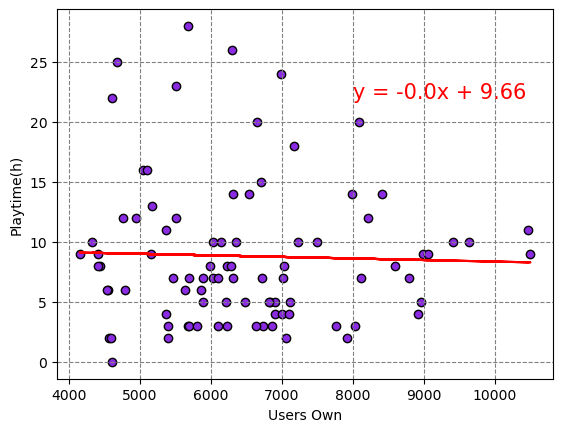

In [ ]:
## USERS OWN VS PLAYTIME(h)
x_values = playtime_df['Users Own']
y_values = playtime_df['Playtime(h)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blueviolet", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8000,22),fontsize=15,color="red")
plt.grid(color="grey", linestyle="--")
plt.xlabel('Users Own')
plt.ylabel('Playtime(h)')
plt.show()

# Users Added vs. Playtime(h)
 *See Fig1*

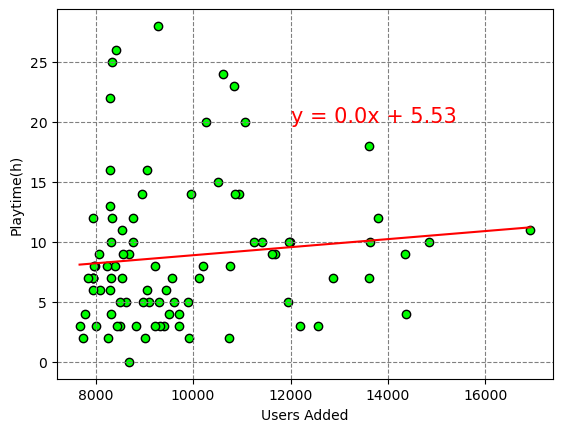

In [ ]:

x_values = playtime_df['Users Added']
y_values = playtime_df['Playtime(h)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="lime", edgecolors = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12000,20),fontsize=15,color="red")
plt.grid(color="grey", linestyle="--")
plt.xlabel('Users Added')
plt.ylabel('Playtime(h)') 
plt.show()

# Metacritic vs Reco. Count
 *See Fig1*

# Metacritic vs Users Own
 *See Fig1*

# Metacritic vs Added
 *See Fig1*